## E-Commerce Clothing Reviews

Hello and welcome to a new notebook in which we are going to analyze clothing reviews from an e-commerce website. So first, why even do this? Most e-commerce sites probably have transactional data to analyze, so what gives?

Well, transaction data does indeed indicate many things: trends in overall shopping patterns, customer specific shopping patterns and preferences, key products, customer clustering, and the list truly goes on. Review data is messy. A pain. Blah, blah, blah. However, it is super useful.

For example, transactional data details the story of transactions. However, what about non-repeat cutomers? *Maybe they had a horrible experience and left a review?* What about repeat custmers? *Maybe they had a wonderful experience and left a review?* These are details that cannot be derived from transactional data. 

Furthermore, analyzing this data can serve great benefit towards understanding your customers: who you attract, why they're attracted, how to retain them, etc. These are important items that I'm sure every e-commerce site ponders so let's do the messy task of analyzing review data.

---

#### Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

---

#### Loading Data

This is a dataset downloaded from [Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews) and it contains reviews from a Women's e-commerce site.

In [2]:
df = pd.read_csv("./Womens Clothing E-Commerce Reviews.csv")
print(df.shape)
df.head(10)

(23486, 11)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


---

#### Let's take a look at some things about the data

Before I take a deep dive into analyzing the text of the data. It may make just a bit of sense to look at some other things in this dataset. Most of the below analyses will be simple statistics of the data.

**What clothing items sell the most (Or at least reviewed the most)?**

*First, a little column name processing*

In [3]:
def underscore_cols(cols = df.columns):
    
    # container for new cols
    new_cols = []
    # iterate throguh each
    for col in cols:
        
        # if there is a space in the str
        if " " in col:
            
            #repalce with underscore
            new_cols.append(col.replace(" ", "_"))
        
        else:
            new_cols.append(col)
            
    return new_cols

new_cols = underscore_cols()
new_cols

['Unnamed:_0',
 'Clothing_ID',
 'Age',
 'Title',
 'Review_Text',
 'Rating',
 'Recommended_IND',
 'Positive_Feedback_Count',
 'Division_Name',
 'Department_Name',
 'Class_Name']

Getting that out the way makes it easier for column name selecting and such to call additional methods off of. (e.g. `DataFrame.Ex_Column_Name.mean()`). 

---

#### Great. Now, Let's take a look at the data.

In [4]:
df.columns = new_cols

high_sellers = (df
                .assign(n=0)
                .groupby("Clothing_ID")
                .n
                .count()
                .reset_index()
                .sort_values("n", ascending=False)
                .head(20)
               )
high_sellers.head()

,Clothing_ID,n
1078,1078,1024
862,862,806
1094,1094,756
1081,1081,582
872,872,545


---

That's what the underlying data looks like. Now let's visualize. 

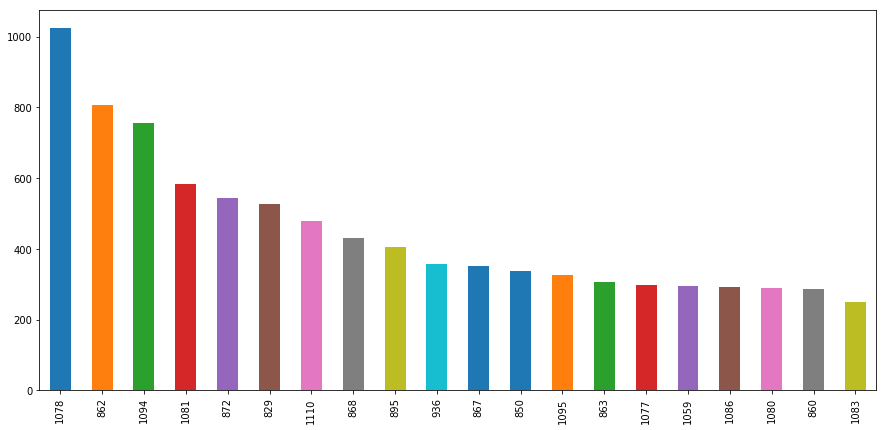

In [5]:
plt.figure(figsize=(15,7))
high_sellers.n.plot(kind="bar")

Okay, so we see that Clothing_ID 1078 was reviewed the most in our dataset (~1000 times). Something also to note is that our high sellers account for roughly 9000 reviews. Now that we are familiar with which products are reviewed the most, what are the distribution of ratings within them?

---

#### Let's look at the distribution of ratings within highly-reviewed products

<Figure size 1152x576 with 0 Axes>

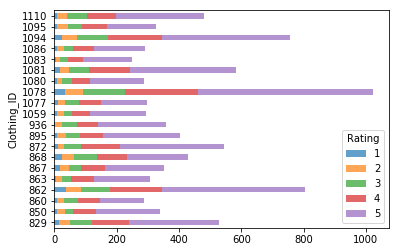

In [6]:
def stacked_bar(df=df, high_sellers=high_sellers):
    
    """
    """
    
    #create a bool to subset data with high selling/reviewed products
    bool_clothid = df.Clothing_ID.isin(high_sellers.Clothing_ID.unique())

    high_sellers_w_rating = (df[bool_clothid]
                             .assign(n=0)
                             .groupby(["Clothing_ID", "Rating"])
                             .n
                             .count()
                             .reset_index()
                             .sort_values("n", ascending=False)
                            )
    
    plt.figure(figsize=(16,8))
    (high_sellers_w_rating
     .pivot(index="Clothing_ID",
            columns = "Rating",
            values="n"
           )
     .plot
     .barh(stacked=True,
           alpha=0.7
          )
    )
    
stacked_bar()

Now we can see the breakdown of ratings given to these most popularly reviewed items. Most of the products have the full range of ratings while a few appear to not have any/many 1 ratings. This tells us more about why these products are being reviewed. It appears here that there is a decent percentage of satisfaction with these highly reviewed products. 

Reviews are great, *but are they going to recommend buying this product to anyone?*

---

#### Let's look at which Clothing ID's have the highest Recommendation rate

In [ ]:
# get recommendation counts
rec_counts = (df
              .groupby("Clothing_ID")
              .Recommended_IND.sum()
              .reset_index()
             )

# get cloth_id counts
rec_counts = rec_counts.merge(df
                 .assign(n=0)
                 .groupby("Clothing_ID")
                 .n
                 .count()
                 .reset_index()
                 .rename(columns={"n":"Count"})
                )

# get percentages
rec_counts = (rec_counts
              .assign(perc = rec_counts.Recommended_IND/rec_counts.Count)
              # get at least 50 reviews
              .query("Count > 50")
              .reset_index(drop=True)
              .sort_values("perc", ascending=False)
             )
(rec_counts
 .head(10)
 .plot(kind="bar",
       x="Clothing_ID",
       y="perc",
       alpha=0.7
      )
)

---

#### What about products w/lowest recommendation percentage?

In [ ]:
(rec_counts
 .tail(10)
 .sort_values("perc")
 .plot(kind="bar",
       x="Clothing_ID",
       y="perc",
       alpha=0.7
      )
)


---

#### Clothing ID - Age Analysis

*Do certain clothing items appeal to age ranges more than others?*

First, let's get an idea of the popular ages of reviewers

In [ ]:
df.assign(Count=0).groupby("Age").Count.count().reset_index().sort_values("Count", ascending=False).head(20).plot(kind="bar", x="Age", y="Count", alpha=0.7)

In [ ]:
# cut points
cutpoints = [0,25,30,35,40,45,55,65,100]
labels=["Under_25", "25_to_30", "30_to_35",
        "35_to_40", "40_to_45", "45_to_55",
        "55_to_65","Over_60"
       ]

binned_ages = pd.cut(df.Age,
                     cutpoints,
                     labels=labels
                    )
(binned_ages
 .reset_index()
 .assign(index=0)
 .groupby("Age")
 .index.count()
 .reset_index()
 .plot(kind="bar",
       x="Age",
       y="index",
       alpha=0.7
      )
)

In [ ]:
df["Age_binned"] = binned_ages
df.head()

---

So let's look at the top 10 products for each age group:

In [ ]:
def most_pop_prods(data=df, n_prods=10, best=True):
    
    """ data is the param for our dataset/dataframe of the reviews w/
    the binned age column.
        n_prods is the param that takes in the number of top products
    you would like to see per age category. 
    """
    
    # group the dataset such that the we have a count of each product
    # relative to the age bin
    age_product_data = (data
                        .assign(Count=0)
                        .groupby(["Age_binned", "Clothing_ID"])
                        .Count
                        .count()
                        .reset_index()
                       )
    

    for age_bin in data.Age_binned.unique():
        
        age_bin_data = (age_product_data
                        .query("Age_binned == '%s'" %age_bin)
                       )
        if best:
            
            age_bin_data = (age_bin_data
                            .sort_values("Count", ascending=False)
                            .reset_index(drop=True)
                            .head(n_prods)
                           )
            best_worst = "Best"
            
        else:
            
            age_bin_data = (age_bin_data
                            # we don't items that have
                            # just been bought once or a few times
                            .query("Count > 4")
                            .sort_values("Count")
                            .reset_index(drop=True)
                            .head(n_prods)
                           )
            best_worst = "Worse"
            
        plt.figure(figsize=(15,7))
        age_bin_data.plot(kind="bar", x="Clothing_ID", y="Count")
        plt.title("%s Products for the %s Age Range" %(best_worst, age_bin))
        
most_pop_prods()

---

What about the worse?

In [ ]:
most_pop_prods(best=False)

---

Great! However, the previous plots actually indicate most reviewed products (and therefore it can be assumed they were the most purchased products by these age groups). Popularity should actually be more reflected in the rating or the average rating.

So let's retrofit the previous function.

In [ ]:
def most_pop_prods(data=df, n_prods=10, best=True):
    
    """ data is the param for our dataset/dataframe of the reviews w/
    the binned age column.
        n_prods is the param that takes in the number of top products
    you would like to see per age category. 
    """
    
    # group the dataset such that the we have a count of each product
    # relative to the age bin
    age_product_data = (data
                        .groupby(["Age_binned", "Clothing_ID"])
                        .Rating
                        .agg(["count", "mean"])
                        .rename(columns={"count":"Count",
                                         "mean":"Avg_Rating"
                                        }
                               )
                        .reset_index()
                       )
    

    for age_bin in data.Age_binned.unique():
        
        age_bin_data = (age_product_data
                        .query("Age_binned == '%s'" %age_bin)
                       )
        if best:
            
            age_bin_data = (age_bin_data
                            # We want the items w/the highest rating
                            # that also sell a lot 
                            .query("Count > 4")
                            .sort_values(["Avg_Rating", "Count"],
                                         ascending=False
                                        )
                            .reset_index(drop=True)
                            .head(n_prods)
                           )
            best_worst = "Best"
            
        else:
            
            age_bin_data = (age_bin_data
                            .sort_values(["Avg_Rating", "Count"])
                            .reset_index(drop=True)
                            .head(n_prods)
                           )
            best_worst = "Worse"
            
        plt.figure(figsize=(15,7))
        a=0.7
        cmap = [(x/24.0,  x/48.0, 0.05) for x in range(len(age_bin_data))]
        age_bin_data.plot(kind="barh",
                          x="Clothing_ID",
                          y="Count",
                          alpha=a,
                          color=cmap,
                          edgecolor="w"
                         )
        plt.title("%s Products for the %s Age Range - Counts" %(best_worst, age_bin))
        
most_pop_prods()

---

#### What do we see now?

Well, even though Clothing_ID 1078 was a popularly bought item amongst nearly all age groups, it was not a highly rated item with any of them. By default, our function put together a top 10 for each age group. Let's look at the top 20.

In [ ]:
most_pop_prods(n_prods=20)

---

#### What are the biggest divisions amongst each age group?

In [ ]:
age_div_data = (df
                .assign(Count=0)
                .groupby(["Age_binned", "Division_Name"])
                .Count
                .count()
                .reset_index()
               )


In [ ]:
def most_pop_divs(data=df, reverse=False):
    
    """
    """
    
    age_div_data = (df
                    .assign(Count=0)
                    .groupby(["Age_binned", "Division_Name"])
                    .Count
                    .count()
                    .reset_index()
                   )
    
    # Which age groups account for the biggest buyers of 
    # certain divisions
    if reverse:
        
        plt.figure(figsize=(15,7))
        (age_div_data
         .pivot(index="Division_Name",
                columns="Age_binned",
                values="Count"
               )
         .plot
         .barh(stacked=True)
        )
        
    else:
        
        # pivot to get values and plot
        plt.figure(figsize=(15,7))
        (age_div_data
         .pivot(index="Age_binned",
                columns="Division_Name",
                values="Count"
               )
         .reset_index()
         .plot
         .barh(stacked=True,
               x="Age_binned",
               alpha=0.7
              )
        )
most_pop_divs()

---

#### What about in reverse?

Cool, so we see each of the age groups largest division is the General division. Most of the age groups maintain roughly the same ratios as well, though we could delve into the numbers to verify.

Instead, let's see how each of the age groups contribute to the Division's purchases.

In [ ]:
most_pop_divs(reverse=True)

---

#### What about Departments?

Let's look at the popularity of Departments among age groups.

In [ ]:
# let's just make this more general so that 
#we can create more reusability out of it
def stacked_plot(data=df, var1="Age_binned", var2="Department_Name", agg="count",reverse=False):
    
    """
    """
    
    age_div_data = (df
                    .assign(Count=0)
                    .groupby([var1, var2])
                    .Count
                    .agg([agg])
                    .reset_index()
                   )
    
    # Which age groups account for the biggest buyers of 
    # certain divisions
    if reverse:
        
        plt.figure(figsize=(15,7))
        (age_div_data
         .pivot(index=var2,
                columns=var1,
                values=agg
               )
         .plot
         .barh(stacked=True, alpha=0.7)
        )
        plt.legend(loc="best")
        
    else:
        
        # pivot to get values and plot
        plt.figure(figsize=(15,7))
        (age_div_data
         .pivot(index=var1,
                columns=var2,
                values=agg
               )
         .reset_index()
         .plot
         .barh(stacked=True,
               x=var1,
               alpha=0.7
              )
        )
        plt.legend(loc="best")
stacked_plot()


In [ ]:
stacked_plot(reverse=True)

---

#### Is there any Department that typically pulls higher ratings?

In [ ]:
stacked_plot(var1="Department_Name", var2 = "Rating")

---

#### What about recommnendations?

In [ ]:
stacked_plot(var1="Department_Name", var2="Recommended_IND")

---

#### Are certain age groups more likely to recommend?

In [ ]:
stacked_plot(var1="Age_binned", var2="Recommended_IND")

---

#### In fact, do certain age groups just rate products more highly?

In [ ]:
stacked_plot(var1="Age_binned", var2="Rating")

---

#### Wrapping up

Now, let's round this up with an interactive dashboard.

In [ ]:
from bokeh.io import curdoc
import yaml
from bokeh.io import (output_notebook,
                      show
                     )

from bokeh.plotting import (Column,
                            figure,
                            Row
                           )

from bokeh.themes import Theme
from bokeh.core.properties import value
from bokeh.transform import jitter
from bokeh.palettes import (Reds9,
                            Oranges9,
                            YlGn9,
                            Blues9,
                            Purples9,
                            Greens9
                           )

from bokeh.models import (ColumnDataSource,
                          ColorBar,
                          HBar,
                          HoverTool,
                          LinearColorMapper,
                          Select
                         )
output_notebook()


In [ ]:
def interactive_simple_bar(doc):
    
    def simple_bar(df=df, var="Clothing_ID", n_top=20):

        """ This function creates a Bokeh bar plot. It displays
        the top 20 results of the variable.
        df - the review dataset.
        var - the variable to view 
        n_top - the number of results to return
        """

        # change the data type
        df[var] = df[var].astype(str)

        # group data by variable and get count
        data = (df
                .assign(Count=0)
                .groupby(var)
                .Count
                .count()
                .reset_index()
                .sort_values("Count", ascending=False)
                .reset_index(drop=True)
                .head(n_top)
               )

        # create mapper
        mapper = LinearColorMapper(palette=Purples9[::-1])

        # provide names for xlabel
        names = [*data[var].astype(str).unique()]

        # instnatiate the figure
        p = figure(y_range=names,
                   title = "%s Count" %var
                  )

        # fill figure
        p.hbar(
            y=var,
            right="Count",
            height=0.9,
            source=ColumnDataSource(data=data),
            alpha=0.6,
            hover_alpha=0.8,
            fill_color = {
                "field":'Count',
                "transform":mapper
            }
        )

        # add hover tool
        if var == "Clothing_ID":
            
            p.add_tools(HoverTool(
                tooltips = [
                    ("%s" %var, "@%s" %var),
                    ("Count", "@Count" ),
                    ("Average Review per Product", "%f" %data.Count.mean())
                ],            
                point_policy="follow_mouse"
            ))
        elif var == "Age" or var == "Age_binned":
            
            p.add_tools(HoverTool(
                tooltips = [
                    ("%s" %var, "@%s" %var),
                    ("Count", "@Count" ),
                    ("Average Age", "%f" %df.Age.mean()),
                    ("Median Age", "%f" %df.Age.median())
                ],            
                point_policy="follow_mouse"
            ))
            
        elif var == "Rating":
            
            p.add_tools(HoverTool(
                tooltips = [
                    ("%s" %var, "@%s" %var),
                    ("Count", "@Count" ),
                    ("Average Rating", "%f" %data.Rating.mean()),
                    ("Median Rating", "%f" %data.Rating.median())
                ],            
                point_policy="follow_mouse"
            ))
        
        else:
            
            p.add_tools(HoverTool(
                tooltips = [
                    ("%s" %var, "@%s" %var),
                    ("Count", "@Count" )
                ],            
                point_policy="follow_mouse"
            ))

        return p

    # create select for users to select the variable
    # def options 
    opts = ["Clothing_ID", "Age", "Rating", "Recommended_IND",
            "Division_Name", "Division_Name", "Department_Name",
            "Class_Name", "Age_binned"
           ]
    var_select = Select(title="Select a variable to view: ",
                        #options displayed to user to select from
                        options=opts,
                        # intial value
                        value="Clothing_ID"
                       )
    n_select = Select(title="Select how many to view: ",
                      options=["5", "10", "15", "20", "25", "30"],
                      value="20"
                     )

    # define callback function
    def update_plot(attr, old, new):

        layout.children[1] = simple_bar(var=var_select.value,
                                        n_top=int(n_select.value)
                                       )

    # add in interactivity to widget
    var_select.on_change("value", update_plot)
    n_select.on_change('value', update_plot)

    # define layout
    layout = Column(var_select, n_select, simple_bar())

    # create document and add components to the doc
    doc.add_root(layout)
    doc.theme = Theme(json=yaml.load(
                """ attrs:
                        Figure:
                            background_fill_color: "#DDDDDD"
                            outline_line_color: white
                            toolbar_location: above
                            height: 500
                            width: 800
                """
            ))

show(interactive_simple_bar)

In [ ]:
def interactive_stacked_bar(doc):
    
    def stacked_bar_plot(df=df, var1="Age_binned", var2="Class_Name"):

        my_colors = Oranges9+Reds9+YlGn9+Blues9+Purples9

        # change types
        df[[var1, var2]] = df[[var1, var2]].astype(str)
        data = (df
                .assign(Count=0)
                .groupby([var1, var2])
                .Count
                .count()
                .reset_index()
                .pivot(index=var1,
                       columns=var2,
                       values="Count"
                      )
                .reset_index()
                .fillna(0)
               )

        # create list of cats for var1
        levels1 = [*data[var1].unique()]

        # create list of stack levels/classes of var2
        # remove col name of var1
        col_names = [*data.columns]
        col_names.remove(var1)
        levels2 = col_names

        # define colors
        colors = my_colors[:len(levels2)]

        # instantiate the figure
        p = figure(y_range = levels1,
                   tools="hover, wheel_zoom",
                   tooltips="$name @%s: @$name" %var1,
                   plot_height=400,
                   plot_width=600
                  )

        # fill figure
        p.hbar_stack(levels2,
                     y=var1,
                     height=0.9,
                     color=colors,
                     source = ColumnDataSource(data=data),
                     legend=[value(x) for x in levels2]
                    )

        return p

    # create selects
    opts = [x for x in df.columns if x not in ["Unnamed:_0", "Age", "Title", "Review_Text"]]
    var1_select = Select(value="Age_binned",
                         options=opts,
                         title="Select the variable for the y-axis: "
                        )
    var2_select=Select(value="Class_Name",
                       options=opts,
                       title="Select the variable to display within the counts: "
                      )

    def update_plot(attr, old, new):

        layout.children[1] = stacked_bar_plot(var1=var1_select.value,
                                               var2=var2_select.value
                                              )

    # add in interactions
    var1_select.on_change("value", update_plot)
    var2_select.on_change("value", update_plot)

    # define layout
    layout = Column(Column(var1_select, var2_select),
                    stacked_bar_plot()
                   )

    # create document and add components to the doc
    doc.add_root(layout)
    doc.theme = Theme(json=yaml.load(
                """ attrs:
                        Figure:

                            outline_line_color: white
                            toolbar_location: above
                            height: 500
                            width: 800
                """
            ))
show(interactive_stacked_bar)

In [ ]:
def interactive_scatter_plot(doc):
    
    def scatter_plot(df=df, var1="Age_binned", var2="Class_Name", var3="Rating", agg="mean"):

        """This function plots a categorical variable and its values relative to 
        var2. 
            df - our reviews dataset.
            var1 - the variable of which we will be looking at values for.
            var2 - the variable that we will analyze variable 1's values 
        against.
            var3 - the variable for which the values will come from. So in our 
        case we have Rating. This will give us the Ratings corresponding to each
        Class_Name given by each Age bin. 
        """

        # create dataset
        #change types
        df[[var1, var2]] = df[[var1, var2]].astype(str)
        df[var3] = df[var3].apply(pd.to_numeric)
        # perform groupby and aggregation
        data = (df
                .groupby([var1, var2])[var3]
                .agg(["count", "mean", "median",
                      "min", "max", "std"
                     ])
                .reset_index()
               )

        # instantiate figure 
        levels = [*df[var1].unique()]
        p = figure(plot_width=800,
                   plot_height=600,
                   y_range=levels
                  )

        # create color mapper
        mapper = LinearColorMapper(palette=Greens9[::-1])
        p.circle(x=agg,
                 y=jitter(var1, width=0.6, range=p.y_range),
                 source=ColumnDataSource(data=data),
                 alpha=0.3,
                 hover_alpha=0.5,
                 size=25,
                 fill_color={"field":"%s" %agg,
                             "transform":mapper
                            }
                )

        # hover capabilities
        p.add_tools(HoverTool(tooltips=[
            ("%s" %var1, "@%s" %var1),
            ("%s" %var2, "@%s" %var2),
            ("%s" %agg, "@%s" %agg)
        ]))

        return p

    # define options for selects
    opts = [x for x in df.columns if x not in ["Unnamed:_0", "Age", "Title", "Review_Text"]]
    var3_opts = ["Recommended_IND", "Positive_Feedback_Count", "Rating"]
    agg_opts = ["count", "mean", "median", "min", "max", "std"]

    # define selects
    var1_select = Select(value="Age_binned",
                         title="Select a variable to view on y-axis",
                         options=opts)
    var2_select = Select(value="Class_Name",
                         title="Select a variable to filter variable 1 values with: ",
                         options=opts)
    var3_select = Select(value="Rating",
                         title="Select a variable of which values to view: ",
                         options=var3_opts)
    agg_select = Select(value="mean", 
                        title="Select an aggregation value to view: ",
                        options=agg_opts)

    # def interactive capabilities
    def update_plot(attr, old, new):

        layout.children[1] = scatter_plot(var1=var1_select.value,
                                          var2=var2_select.value,
                                          var3=var3_select.value,
                                          agg=agg_select.value
                                         )
    # add in interactive capabilities
    var1_select.on_change("value", update_plot)
    var2_select.on_change("value", update_plot)
    var3_select.on_change("value", update_plot)
    agg_select.on_change("value", update_plot)

    # define the layout
    layout = Column(Column(var1_select, var2_select, var3_select, agg_select),
                    scatter_plot()
                   )
    # create document and add components to the doc
    doc.add_root(layout)
    doc.theme = Theme(json=yaml.load(
                """ attrs:
                        Figure:

                            outline_line_color: white
                            toolbar_location: above
                            height: 500
                            width: 800
                """
            ))
    
show(interactive_scatter_plot)


In [ ]:
df.to_pickle("./clothing_reviews.pkl")

---

#### Thanks for reading!

In the next notebook, we will be taking a dive into the reviews.